In [3]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics
test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin = keras.models.load_model('./medical_ann.h5')
test_accu = model_fin.evaluate(test_set, steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')

Found 624 images belonging to 2 classes.


  1/624 ━━━━━━━━━━━━━━━━━━━━ 2:20 226ms/step - accuracy: 0.8750 - loss: 0.3065

/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8368 - loss: 0.3511  
The testing accuracy is : 83.65384340286255 %


2024-05-29 16:54:20.307744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
actual || predict
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA 

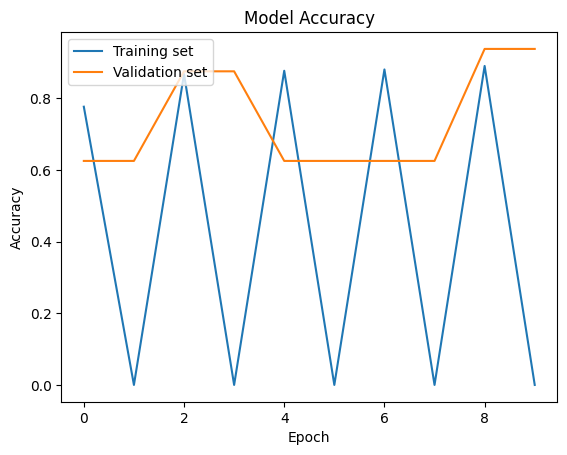

<Figure size 640x480 with 0 Axes>

In [14]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

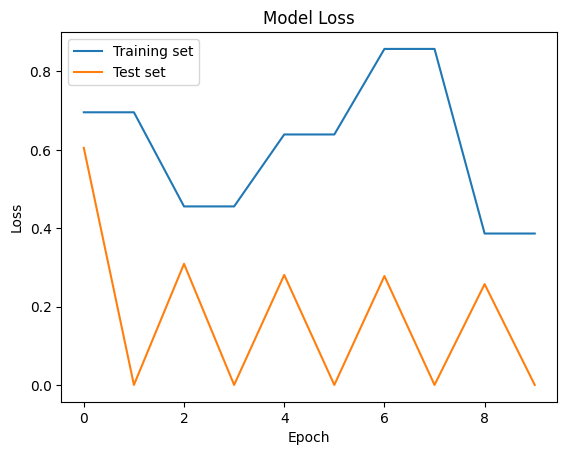

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()